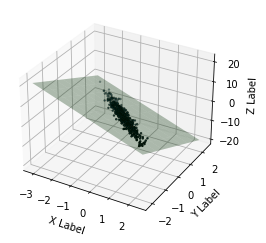

In [ ]:
#   Fernando Sckaff
#   Programming Assignment - Homework 1
#   01/22/2023 ; 2:37pm

#   Write a program to determine the plane in which 500 random vectors in R3 are projected into by the
#   action of a projection operator given by 𝑃 = 𝐴(𝐴^𝑇 𝐴)^{−1}𝐴^𝑇
#   where 𝐴 = [𝑣1 , 𝑣2] and 𝑣1 , 𝑣2 are two independent, random vectors in R3. (The matrix 𝑃 is a projection
#   matrix which confines vectors 𝑃𝑣 into a subspace spanned by 𝑣1 and 𝑣2.) Confirm that 𝑃𝑣 returns a vector
#   in R3 for 𝑣 ∈ R3 and therefore all 500 random vectors retain their ”three dimensional” nature. Despite
#   this, they actually live in a 2D subspace. Plot the 500 vectors in R3 and the plane in which they live.

## Import libraries
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Define vectors and projection matrix
v3 = np.random.randn(3,500) # 500 random vectors in R^3,
A3 = np.random.randn(3,2) # Two specific random vector in R^3.
P3 = (A3 @ np.linalg.inv(A3.T @ A3)) @ A3.T #  A projection matrix constructed out of A3.
w3 = P3 @ v3 # Projection matrix P3 applied on the 500 R^3 original vectors

## Define plane
def fun(x, y): # z-axis function
    temp = np.cross(A3[:,0], A3[:,1]) # Cross product of two vectors in A3
    return ((-temp[0]*x) - (temp[1]*y))/temp[2] # z=(-ax-by)/c

x = np.linspace(round(w3[0,:].min()-0.5, 2), round(w3[0,:].max()+0.5, 2), 10) # Set x limits for the plane
y = np.linspace(round(w3[1,:].min()-0.5, 2), round(w3[1,:].max()+0.5, 2), 10) # Set y limits for the plane
X, Y = np.meshgrid(x, y) # Generate basis of the plane. Ranging from -3 to 3 on x and y axis
zs = np.array(fun(np.ravel(X), np.ravel(Y))) # Generate z-axis values
Z = zs.reshape(X.shape) # Reshape z-axis values to fit the plane

## Plot 3D
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, color='g', alpha=0.3) # Plot surface
ax.scatter(w3[0,:],w3[1,:],w3[2,:], edgecolors='k', s=2) # Scatter plot of projected vectors in R^3.
ax.quiver([0, 0], [0, 0], [0, 0], A3[0,:], A3[1,:], A3[2,:], length = 1, color='r', arrow_length_ratio=0.1, linewidth=2, normalize="true") # Origin vectors as red arrows

## Show X, Y, Z labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()